## <font color='blue'> github.com/uieyao1199
# Game of Thrones 
### Charactor Death Prediction

In [1]:
# Loading Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 

# Importing new libraries
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
import statsmodels.formula.api as smf 
import sklearn.metrics 
from sklearn.model_selection import cross_val_score 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score 

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file = 'GOT_character_predictions.xlsx'
got_df = pd.read_excel(file)

## Data Exploration

In [4]:
got_df.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones',
       'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
       'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [5]:
got_df.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1739,Imry Florent,Ser,1,NaN,NaN,NaN,NaN,NaN,House Florent,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.183946,0
1,1233,Merianne Frey,NaN,0,NaN,288.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,NaN,0,0,17.0,0,0.083612,1
2,998,Dolf,NaN,0,Vale mountain clans,NaN,NaN,NaN,NaN,Stone Crows,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
3,64,Quill,NaN,1,Braavosi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
4,334,Bandy,NaN,0,Northmen,NaN,NaN,NaN,NaN,House Stark,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.020067,1


In [6]:
got_df.shape

(1946, 26)

In [7]:
got_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
male                          1946 non-null int64
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null f

In [8]:
got_df.describe().round(2)

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,0.62,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,0.49,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,0.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,0.00,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,1.00,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,1.00,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,1.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


## Imputing Missing Value

In [9]:
print(
      got_df
      .isnull()
      .sum()
      )

S.No                             0
name                             0
title                         1008
male                             0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


#### Creating Columns for missing value flagging

In [9]:
for col in got_df:

    """ Create columns that are 0s if a value was not missing and 1 if
    a value is missing. """
    
    if got_df[col].isnull().any():
        got_df['m_'+col] = got_df[col].isnull().astype(int)
        
got_df.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1739,Imry Florent,Ser,1,NaN,NaN,NaN,NaN,NaN,House Florent,...,1,1,1,0,1,1,1,1,1,1
1,1233,Merianne Frey,NaN,0,NaN,288.0,NaN,NaN,NaN,House Frey,...,1,1,1,0,1,1,1,1,1,0
2,998,Dolf,NaN,0,Vale mountain clans,NaN,NaN,NaN,NaN,Stone Crows,...,1,1,1,0,1,1,1,1,1,1
3,64,Quill,NaN,1,Braavosi,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,334,Bandy,NaN,0,Northmen,NaN,NaN,NaN,NaN,House Stark,...,1,1,1,0,1,1,1,1,1,1


#### remove outlier in title, '[1]' and replaced with 'unknown'

In [10]:
got_df['title'].replace('[1]','',inplace=True)

##### culture has some typos

In [11]:
got_df['culture'].replace('Andals','Andal',inplace=True)
got_df['culture'].replace("Asshai'i","Asshai",inplace=True)
got_df['culture'].replace("Astapori","Astapor",inplace=True)
got_df['culture'].replace('Braavosi','Braavos',inplace=True)
got_df['culture'].replace('Lhazarene','Lhazareen',inplace=True)
got_df['culture'].replace('Lysene','Lyseni',inplace=True)
got_df['culture'].replace('Meereenese','Meereen',inplace=True)
got_df['culture'].replace('Norroshi','Norros',inplace=True)
got_df['culture'].replace('Qartheen','Qarth',inplace=True)
got_df['culture'].replace('Reachmen','Reach',inplace=True)
got_df['culture'].replace('Stormlander','Stormlands',inplace=True)
got_df['culture'].replace('Summer Islander','Summer Islands',inplace=True)
got_df['culture'].replace('Westermen','Westerlands',inplace=True)
got_df['culture'].replace('Westerman','Westerlands',inplace=True)
got_df['culture'].replace('westermen','Westerlands',inplace=True)
got_df['culture'].replace('Wildlings','Wildling',inplace=True)
got_df['culture'].replace('ironborn','Ironborn',inplace=True)
got_df['culture'].replace('northmen','Northmen',inplace=True)

#### Factorize those categorical variables and convert them into factor
this will assign missing_values a '-1' and the rest categorical value with integer starting from 1 to ...

In [12]:
got_df['title']=pd.factorize(got_df.title)[0]
got_df['dateOfBirth']=pd.factorize(got_df.dateOfBirth)[0]
got_df['mother']=pd.factorize(got_df.mother)[0]
got_df['father']=pd.factorize(got_df.father)[0]
got_df['heir']=pd.factorize(got_df.heir)[0]
got_df['house']=pd.factorize(got_df.house)[0]
got_df['spouse']=pd.factorize(got_df.spouse)[0]
got_df['culture']=pd.factorize(got_df.culture)[0]
got_df['age']=pd.factorize(got_df.age)[0]

#### For those numerical or binomial variables, replace missing_values with '-1' to stay consistent with how we treated the missing_values in categorical variables

In [13]:
got_df['isAliveMother']=got_df['isAliveMother'].fillna(-1)
got_df['isAliveFather']=got_df['isAliveFather'].fillna(-1)
got_df['isAliveHeir']=got_df['isAliveHeir'].fillna(-1)
got_df['isAliveSpouse']=got_df['isAliveSpouse'].fillna(-1)

Double check if there is any more missing variables

In [15]:
got_df.isnull().any().any()

False

#### Plot the histogram of those numeric or binomial varibales to double check the effect after missing_values imputation

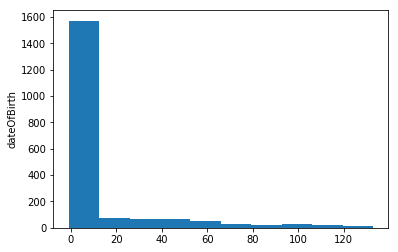

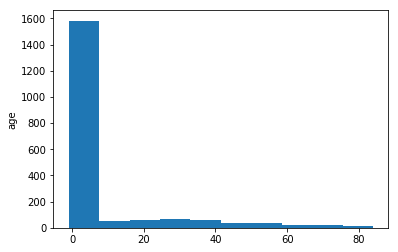

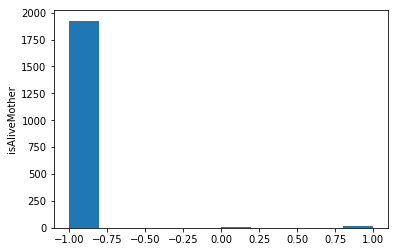

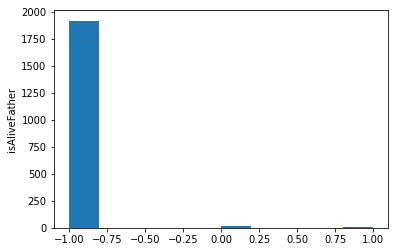

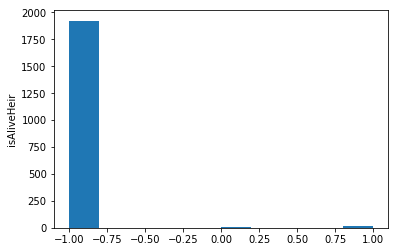

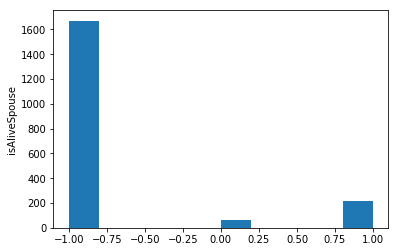

In [115]:
hist_col = ['dateOfBirth', 'age','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse',]

for col in hist_col:
    plt.hist(got_df[col].dropna())
    plt.ylabel(col)
    plt.show()

- Since Charactor's name will have least prodictive value for our model, so we will drop the column of names.
- Father's and mother's names also add very little value: we will use whether or not their father and mother are known or not, i.e. m_father and m_mother 
- Likewise, heir's and spouse's also add little value, we will assume to have or don't have: m_heir, m_spouse

In [19]:
got_df=got_df.drop(['name', 'mother', 'father', 'heir', 'spouse'], axis=1)

In [21]:
got_df.to_excel('got_explored.xlsx')

file = 'got_explored.xlsx'
got = pd.read_excel(file)

## Correlation Heatmap

In [22]:
df_corr = got.corr().round(2)

print(df_corr)

                            S.No  title  male  culture  dateOfBirth  house  \
S.No                        1.00   0.20  0.12     0.10         0.15   0.15   
title                       0.20   1.00  0.04     0.12         0.08   0.19   
male                        0.12   0.04  1.00     0.05         0.00   0.02   
culture                     0.10   0.12  0.05     1.00         0.02   0.02   
dateOfBirth                 0.15   0.08  0.00     0.02         1.00  -0.05   
house                       0.15   0.19  0.02     0.02        -0.05   1.00   
book1_A_Game_Of_Thrones     0.29   0.11  0.08     0.07         0.10  -0.05   
book2_A_Clash_Of_Kings      0.31  -0.00  0.06    -0.01         0.15  -0.04   
book3_A_Storm_Of_Swords     0.37   0.04  0.02    -0.01         0.10   0.03   
book4_A_Feast_For_Crows     0.28   0.10 -0.06     0.00         0.04   0.15   
book5_A_Dance_with_Dragons  0.41   0.17  0.06     0.18         0.12   0.12   
isAliveMother              -0.08  -0.05  0.07    -0.04        -0

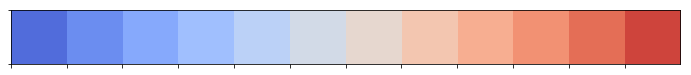

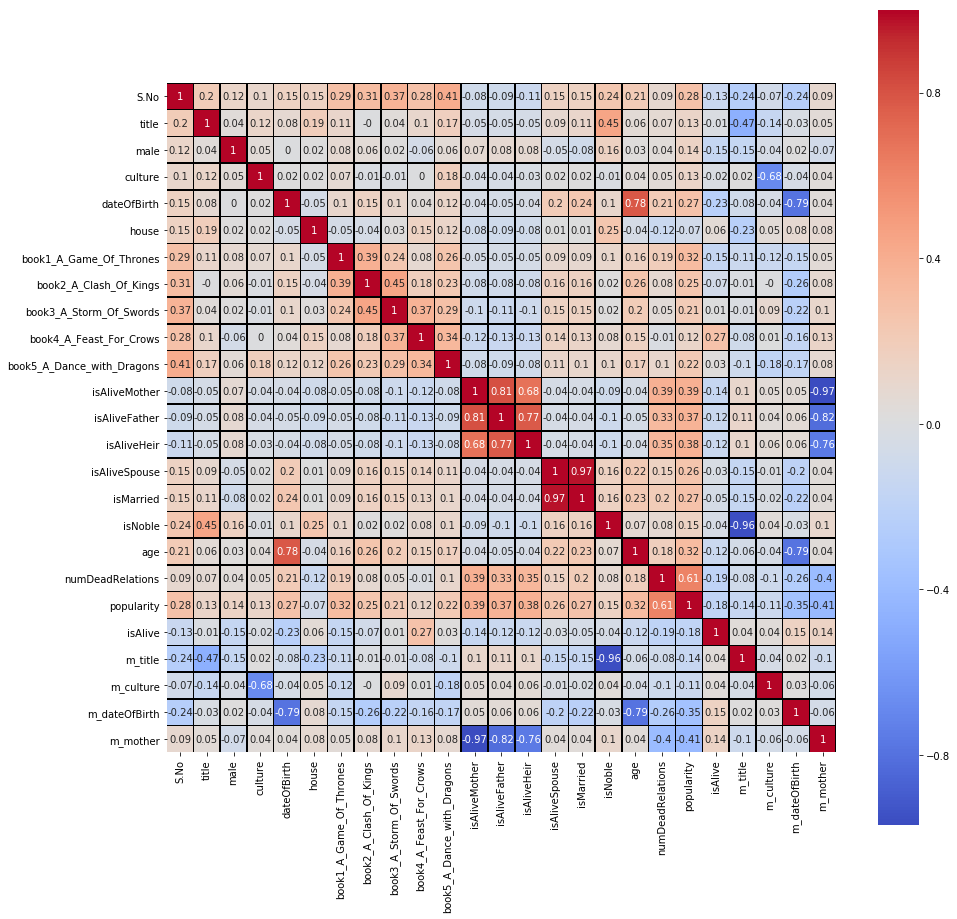

In [23]:
sns.palplot(sns.color_palette('coolwarm', 12))

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:25, 0:25]

sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Bwght Correlation Heatmap 1.png')

plt.show()

# Logistic regression Full

In [28]:
logistic_full = smf.logit(formula = """isAlive ~ got['S.No'] +
                                              got['title'] +
                                              got['male'] +
                                              got['dateOfBirth']+
                                              got['culture'] +
                                              got['house'] +
                                              got['book1_A_Game_Of_Thrones'] +
                                              got['book2_A_Clash_Of_Kings'] +
                                              got['book3_A_Storm_Of_Swords'] +
                                              got['book4_A_Feast_For_Crows'] +
                                              got['book5_A_Dance_with_Dragons'] +
                                              got['isAliveMother'] +
                                              got['isAliveFather'] +
                                              got['isAliveHeir'] +
                                              got['isAliveSpouse'] +
                                              got['isMarried'] +
                                              got['isNoble'] +
                                              got['age'] +
                                              got['numDeadRelations'] +
                                              got['popularity']""",data = got)


results_logistic = logistic_full.fit()


results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.455120
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1925
Method:                           MLE   Df Model:                           20
Date:                Mon, 18 Mar 2019   Pseudo R-squ.:                  0.1974
Time:                        02:26:18   Log-Likelihood:                -885.66
converged:                       True   LL-Null:                       -1103.5
                                        LLR p-value:                 7.553e-80
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             1.3340      0.620      2.152      0.031       0.119       2.549
got['S.No']                          -0.0008      0.000     -6.339      0.000      -0.001      -0.001
got['title']                          0.0004      0.001      0.320      0.749      -0.002       0.003
got['male']                          -0.6613      0.137     -4.818      0.000      -0.930      -0.392
got['dateOfBirth']                   -0.0277      0.004     -7.245      0.000      -0.035      -0.020
got['culture']                       -0.0003      0.007     -0.043      0.966      -0.015       0.014
got['house']                          0.0001      0.001      0.203      0.839      -0.001       0.002
got['book1_A_Game_Of_Thrones']       -0.6294      0.156     -4.043      0.000      -0.935      -0.324
got['book2_A_Clash_Of_Kings']        -0.1656      0.143     -1.161      0.246      -0.445       0.114
got['book3_A_Storm_Of_Swords']       -0.2821      0.148     -1.911      0.056      -0.571       0.007
got['book4_A_Feast_For_Crows']        1.7543      0.155     11.336      0.000       1.451       2.058
got['book5_A_Dance_with_Dragons']     0.2129      0.148      1.438      0.150      -0.077       0.503
got['isAliveMother']                 -1.1793      0.586     -2.011      0.044      -2.329      -0.030
got['isAliveFather']                  0.1746      0.679      0.257      0.797      -1.156       1.505
got['isAliveHeir']                   -0.2474      0.460     -0.538      0.591      -1.149       0.655
got['isAliveSpouse']                  0.6499      0.380      1.710      0.087      -0.095       1.395
got['isMarried']                     -1.2926      0.703     -1.840      0.066      -2.670       0.084
got['isNoble']                        0.0545      0.144      0.377      0.706      -0.229       0.338
got['age']                            0.0194      0.006      3.249      0.001       0.008       0.031
got['numDeadRelations']              -0.1185      0.052     -2.261      0.024      -0.221      -0.016
got['popularity']                     0.0819      0.512      0.160      0.873      -0.921       1.085
=====================================================================================================
"""

In [29]:
print('AIC:', results_logistic.aic.round(2))
print('BIC:', results_logistic.bic.round(2))

AIC: 1813.33
BIC: 1930.37


## train/test split with the optimal model

In [30]:
got_data = got.loc[: , ['S.No', 'title', 'male', 'culture', 'dateOfBirth',
        'house','book1_A_Game_Of_Thrones',
       'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
       'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother',
       'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother',
       'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age']]
got_target =  got.loc[: , 'isAlive']


X_train, X_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.10,
            random_state = 508,
            stratify = got_target)

# 1.0 KNN Optimal model 

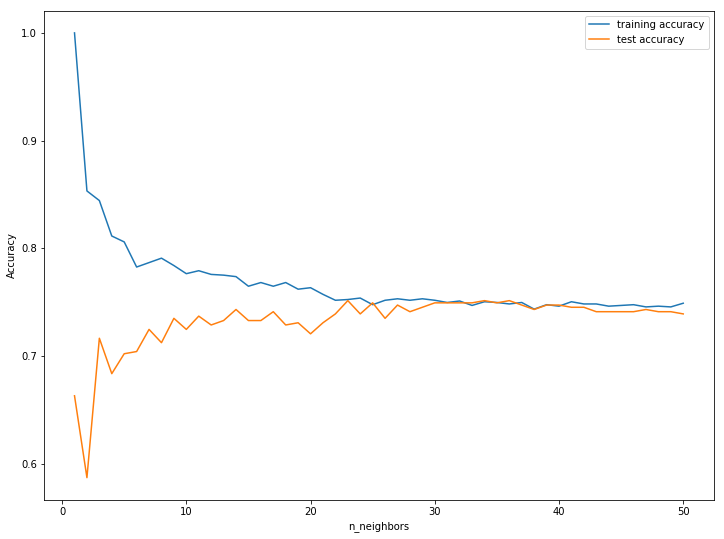

In [31]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors) ## not regressor, it's Classifer now
    clf.fit(X_train, y_train.values.ravel())
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


fig, ax = plt.subplots(figsize=(12,9))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [32]:
# Looking for the highest test accuracy
print(test_accuracy)

[0.6632443531827515, 0.5872689938398358, 0.7166324435318275, 0.6837782340862423, 0.702258726899384, 0.704312114989733, 0.7248459958932238, 0.7125256673511293, 0.7351129363449692, 0.7248459958932238, 0.7371663244353183, 0.728952772073922, 0.7330595482546202, 0.7433264887063655, 0.7330595482546202, 0.7330595482546202, 0.7412731006160165, 0.728952772073922, 0.731006160164271, 0.7207392197125256, 0.731006160164271, 0.7392197125256673, 0.7515400410677618, 0.7392197125256673, 0.7494866529774127, 0.7351129363449692, 0.7474332648870636, 0.7412731006160165, 0.7453798767967146, 0.7494866529774127, 0.7494866529774127, 0.7494866529774127, 0.7494866529774127, 0.7515400410677618, 0.7494866529774127, 0.7515400410677618, 0.7474332648870636, 0.7433264887063655, 0.7474332648870636, 0.7474332648870636, 0.7453798767967146, 0.7453798767967146, 0.7412731006160165, 0.7412731006160165, 0.7412731006160165, 0.7412731006160165, 0.7433264887063655, 0.7412731006160165, 0.7412731006160165, 0.7392197125256673]


In [33]:
# Printing highest test accuracy
print(test_accuracy.index(max(test_accuracy)) + 1)

23


In [34]:
# It looks like optimal number of neighbors is 23
knn_clf = KNeighborsClassifier(n_neighbors = 23)

# Fitting the model based on the training data
knn_clf_fit = knn_clf.fit(X_train, y_train)

In [35]:
knn_training_score = knn_clf_fit.score(X_train, y_train)
knn_testing_Score = knn_clf_fit.score(X_test, y_test)

print('KNN Optimal Training Score:', knn_training_score.round(4))
print('KNN Optimal Testing Score:', knn_testing_Score.round(4))

KNN Optimal Training Score: 0.7526
KNN Optimal Testing Score: 0.7515


## 1.1 Cross Validation with k-folds

In [38]:
# Cross Validating the knn model with three folds
cv_knn_3 = cross_val_score(knn_clf,
                           got_data,
                           got_target,
                           cv = 3)
## it gives us a list of predicted accuracy 
## and we see one is way lower than the other two, so have to look at if there is any 
## inbalance in our code. 

print(cv_knn_3)

[0.73651772 0.74114022 0.72839506]


# 2.0 Logistic Regression

## 2.1 Optimal Logistic Regression

In [43]:
got_data = got.loc[: , ['S.No', 'title', 'male', 'culture', 'dateOfBirth',
        'house','book1_A_Game_Of_Thrones',
       'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
       'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
        'age', 'numDeadRelations', 'popularity',
       'm_title', 'm_culture', 'm_dateOfBirth', 'm_house', 'm_age']]
got_target =  got.loc[: , 'isAlive']


X_train, X_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.10,
            random_state = 508,
            stratify = got_target)

In [44]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C = 1)


logreg_fit = logreg.fit(X_train, y_train)


# Predictions
logreg_pred_train = logreg_fit.predict(X_train)
logreg_pred_test = logreg_fit.predict(X_test)


# Let's compare the testing score to the training score.
logreg_optimal_training_score = logreg_fit.score(X_train, y_train)
logreg_optimal_testing_score = logreg_fit.score(X_test, y_test)

print('LogReg Optimal Training Score', logreg_optimal_training_score.round(4))
print('LogReg Optimal Testing Score:', logreg_optimal_testing_score.round(4))

# AUC 
logreg_training_AUC_score = roc_auc_score(y_train, logreg_pred_train)
logreg_testing_AUC_score = roc_auc_score(y_test, logreg_pred_test)

print('LogReg Optimal Training AUC Score', logreg_training_AUC_score.round(4))
print('LogReg Optimal Testing AUC Score', logreg_testing_AUC_score.round(4))

LogReg Optimal Training Score 0.7971
LogReg Optimal Testing Score: 0.7967
LogReg Optimal Training AUC Score 0.6544
LogReg Optimal Testing AUC Score 0.638


/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2.2 Tuning Optimal Logistic Regression¶

In [45]:
from sklearn.model_selection import GridSearchCV 

In [48]:
# Creating a hyperparameter grid
C_space      = pd.np.arange(0.001, 2, 0.1)
solver_space = ['newton-cg', 'lbfgs']

param_grid = {'C'       : C_space,
              'solver'  : solver_space}


# Building the model object one more time
logreg_object = LogisticRegression(random_state = 508)



# Creating a GridSearchCV object
logreg_grid = GridSearchCV(logreg_object,
                           param_grid,
                           cv = 3,
                           scoring = 'roc_auc',
                           return_train_score = False)



# Fit it to the training data
logreg_grid.fit(X_train, y_train)

/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=508, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
       6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
       1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
       1.801e+00, 1.901e+00]), 'solver': ['newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=0)

In [47]:
print("Tuned Logistic Regression Parameter:", logreg_grid.best_params_)
print("Tuned Logistic Regression Accuracy:",  logreg_grid.best_score_.round(4))

Tuned Logistic Regression Parameter: {'C': 0.6010000000000001, 'solver': 'newton-cg'}
Tuned Logistic Regression Accuracy: 0.7728


In [49]:
# Building our optimal model object
# {'C': 0.6010000000000001, 'solver': 'newton-cg'}
logreg_optimal = LogisticRegression(C = 0.6010000000000001,
                                    solver = 'newton-cg',
                                    random_state = 508)

In [56]:
logreg_optimal_fit = logreg_optimal.fit(X_train, y_train)


logreg_optimal_pred_train = logreg_optimal_fit.predict(X_train)
logreg_optimal_pred_test = logreg_optimal_fit.predict(X_test)


# Accuracy: Let's compare the testing score to the training score.
tuned_logreg_training_score = logreg_optimal_fit.score(X_train, y_train)
tuned_Logreg_testing_score = logreg_optimal_fit.score(X_test, y_test)

print('Tuned Logreg Optimal Training Score:', tuned_logreg_training_score.round(4))
print('Tuned Logreg Optimal Testing Score:', tuned_Logreg_testing_score.round(4))

# AUC:
tuned_logreg_training_AUC_score = roc_auc_score(y_train, logreg_optimal_pred_train)
tuned_logreg_testing_AUC_score = roc_auc_score(y_test, logreg_optimal_pred_test)

print('Tuned Logreg Optimal Training AUC Score:', tuned_logreg_training_AUC_score.round(4))
print('Tuned Logreg Optimal Testing AUC Score:', tuned_logreg_testing_AUC_score.round(4))

Tuned Logreg Optimal Training Score: 0.7951
Tuned Logreg Optimal Testing Score: 0.7926
Tuned Logreg Optimal Training AUC Score: 0.6494
Tuned Logreg Optimal Testing AUC Score: 0.6326


## 2.3 Cross Validate our tuned logistic regression

In [51]:
# Cross-Validating the model with three folds
cv_logreg_optimal_3 = cross_val_score(logreg_optimal,
                                      got_data,
                                      got_target,
                                      cv = 3)


print(cv_logreg_optimal_3)


print('\nAverage: ',
      pd.np.mean(cv_logreg_optimal_3).round(3),
      '\nMinimum: ',
      min(cv_logreg_optimal_3).round(3),
      '\nMaximum: ',
      max(cv_logreg_optimal_3).round(3))

[0.7642527  0.81355932 0.79938272]

Average:  0.792 
Minimum:  0.764 
Maximum:  0.814


## 2.4  Confusion Matrix on the Tuned Optimal Logistic Regression

[[ 38  86]
 [ 15 348]]


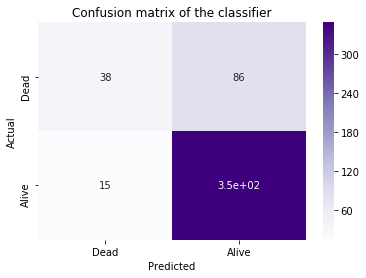

In [52]:
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_optimal_pred_test))


# Visualizing the confusion matrix
labels = ['Dead', 'Alive']

cm = confusion_matrix(y_true = y_test,
                      y_pred = logreg_optimal_pred_test)


sns.heatmap(cm,
            annot = True,
            xticklabels = labels,
            yticklabels = labels,
            cmap = 'Purples')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')
plt.show()

#### with the tuned hyparameters, tuned logistic regression testing scores are better-off
#### and we have very high procisive prediction on 'isAlive' Characters

## 2.5 Let's compare LogReg VS KNN scores

In [57]:
print('Tuned Logreg Optimal Training Score:', tuned_logreg_training_score.round(4))
print('Tuned Logreg Optimal Testing Score:', tuned_Logreg_testing_score.round(4))
print('\n')
print('KNN Optimal Training Score:', knn_training_score.round(4))
print('KNN Optimal Testing Score:', knn_testing_Score.round(4))

Tuned Logreg Optimal Training Score: 0.7951
Tuned Logreg Optimal Testing Score: 0.7926


KNN Optimal Training Score: 0.7526
KNN Optimal Testing Score: 0.7515


#### Logistic regression is better off than KNN

# 3.0 Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier 

c_tree = DecisionTreeClassifier(random_state = 508)

c_tree_fit = c_tree.fit(X_train, y_train)

c_tree_training_score = c_tree_fit.score(X_train, y_train)
c_tree_testing_score = c_tree_fit.score(X_test, y_test)

print('Decision Tree Optimal Training Score', c_tree_training_score.round(4))
print('Decision Tree Optimal Testing Score:', c_tree_testing_score.round(4))

Decision Tree Optimal Training Score 1.0
Decision Tree Optimal Testing Score: 0.7331


## 3.1 Tuned Decision Tree

In [59]:
# Creating a hyperparameter grid
depth_space = pd.np.arange(1, 10)
leaf_space = pd.np.arange(1, 500)

param_grid = {'max_depth' : depth_space,
              'min_samples_leaf' : leaf_space}


# Building the model object one more time
c_tree_2_hp = DecisionTreeClassifier(random_state = 508)



# Creating a GridSearchCV object
c_tree_2_hp_cv = GridSearchCV(c_tree_2_hp, param_grid, cv = 3)



# Fit it to the training data
c_tree_2_hp_cv.fit(X_train, y_train)



# Print the optimal parameters and best score
tuned_c_tree_parameter = c_tree_2_hp_cv.best_params_
tuned_c_tree_accuracy = c_tree_2_hp_cv.best_score_

print("Tuned Decision Tree Parameter:", tuned_c_tree_parameter)
print("Tuned Decision Tree Accuracy:", tuned_c_tree_accuracy)

Tuned Decision Tree Parameter: {'max_depth': 4, 'min_samples_leaf': 3}
Tuned Decision Tree Accuracy: 0.7861549006168609


### Visualizing the Tree

In [60]:
# Importing the necessary libraries
from sklearn.tree import export_graphviz # Exports graphics
from sklearn.externals.six import StringIO # Saves an object in memory
from IPython.display import Image # Displays an image on the frontend
import pydotplus # Interprets dot objects


# Building a tree model object with optimal hyperparameters
# {'max_depth': 4, 'min_samples_leaf': 3}
c_tree_optimal = DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 508,
                                        max_depth = 4,
                                        min_samples_leaf = 3)


c_tree_optimal_fit = c_tree_optimal.fit(X_train, y_train)


dot_data = StringIO()


export_graphviz(decision_tree = c_tree_optimal_fit,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = X_train.columns)


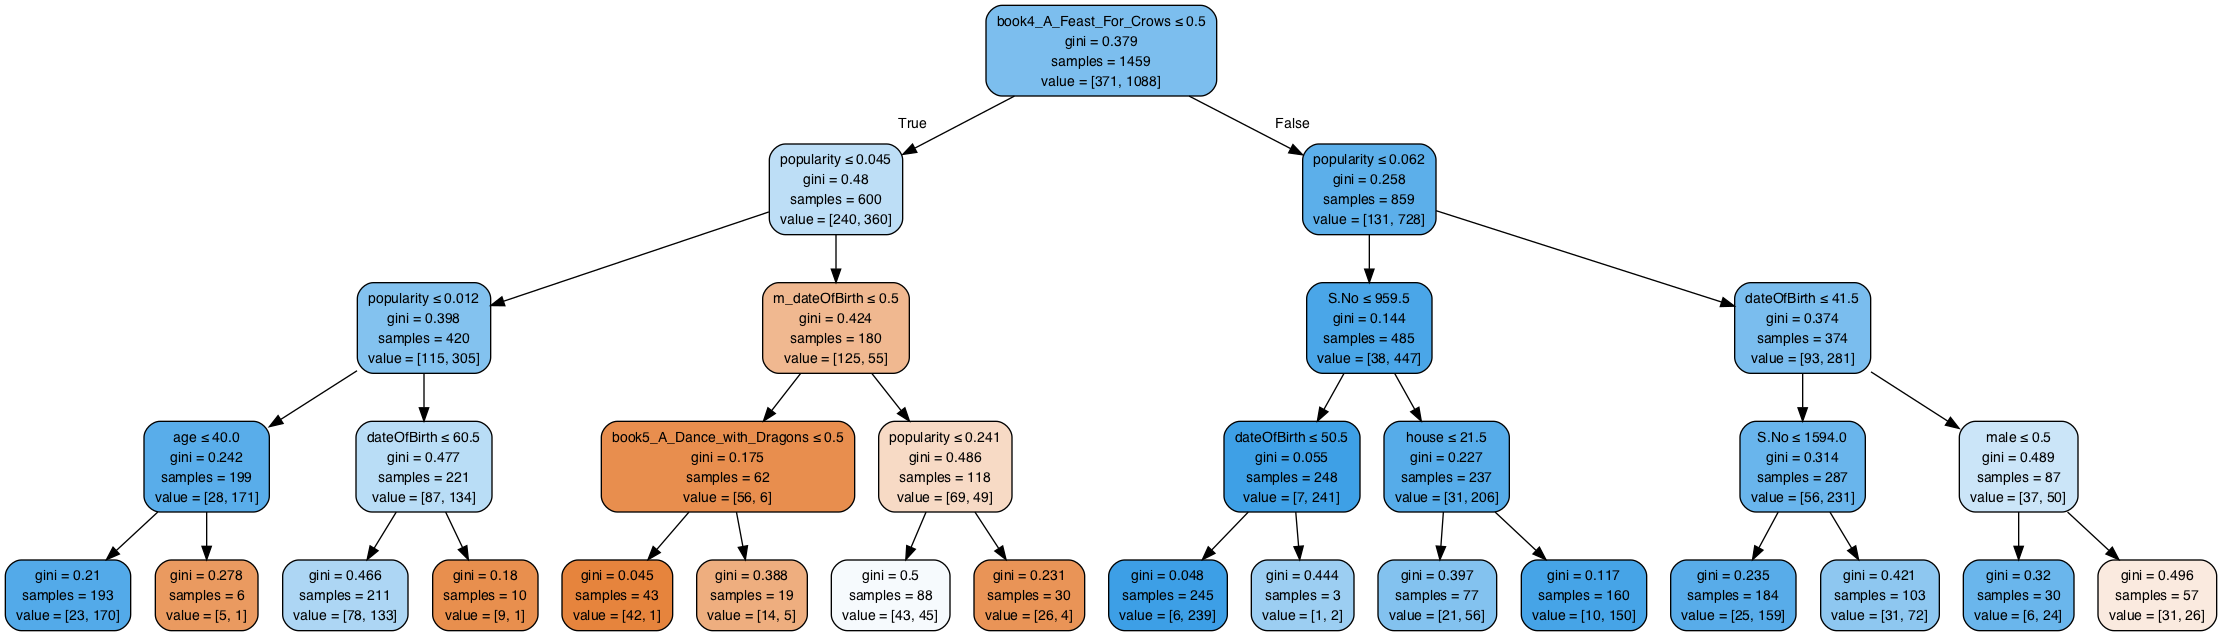

In [61]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png(),
      height = 500,
      width = 800)

In [62]:
# Saving the visualization in the working directory
graph.write_png("GOT_Optimal_Classification_Tree.png")

True

### Feature importance function

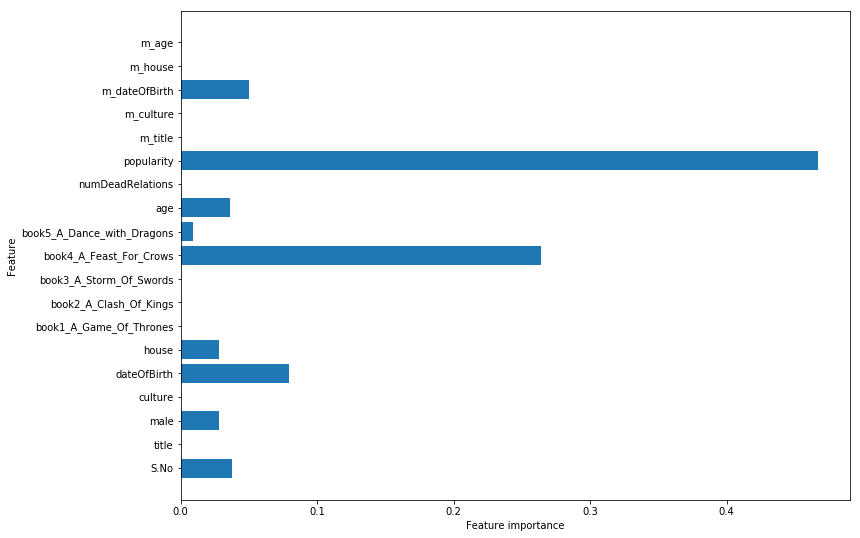

In [63]:
def plot_feature_importances(model, train = X_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

plot_feature_importances(c_tree_optimal,
                         train = X_train,
                         export = True)

## 3.2 Tuned Optimal Decision Tree

In [70]:
# Repreparing train/test split with the optimal model
got_data = got.loc[: , ['S.No', 'male', 'dateOfBirth',
       'house', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
         'age',  'm_dateOfBirth','numDeadRelations', 
        'popularity']]

X_train, X_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.10,
            random_state = 508,
            stratify = got_target)

In [71]:
# {'max_depth': 4, 'min_samples_leaf': 3}

c_tree = DecisionTreeClassifier(max_depth = 4, 
                                min_samples_leaf = 3,
                                random_state = 508)

c_tree_fit = c_tree.fit(X_train, y_train)


# score
tuned_optimal_c_tree_training_Score = c_tree_fit.score(X_train, y_train)
tuned_optimal_c_tree_testing_Score =  c_tree_fit.score(X_test, y_test)

print('Tuned Optimal Decision Tree Training Score', tuned_optimal_c_tree_training_Score.round(4))
print('Tuned Optimal Decision Tree Testing Score:', tuned_optimal_c_tree_testing_Score.round(4))



Tuned Optimal Decision Tree Training Score 0.8067
Tuned Optimal Decision Tree Testing Score: 0.7556


## 3.3 Cross Validate our tuned logistic regression

In [67]:
# Cross-Validating the model with three folds
cv_dt_optimal_3 = cross_val_score(c_tree_fit,
                                      got_data,
                                      got_target,
                                      cv = 3)


print(cv_dt_optimal_3)


print('\nAverage: ',
      pd.np.mean(cv_dt_optimal_3).round(3),
      '\nMinimum: ',
      min(cv_dt_optimal_3).round(3),
      '\nMaximum: ',
      max(cv_dt_optimal_3).round(3))

[0.77503852 0.77966102 0.77160494]

Average:  0.775 
Minimum:  0.772 
Maximum:  0.78


# 4.0 Random Forest

In [72]:
# Repreparing train/test split with the optimal model
got_data = got.loc[: , ['S.No', 'male', 'dateOfBirth',
       'house', 'culture','book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
         'age', 'numDeadRelations','m_dateOfBirth','popularity']]

X_train, X_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.10,
            random_state = 508,
            stratify = got_target)

In [73]:
# Loading new libraries
from sklearn.ensemble import RandomForestClassifier

# Full forest using gini
full_forest_gini = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'gini',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)


# Full forest using entropy
full_forest_entropy = RandomForestClassifier(n_estimators = 500,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     min_samples_leaf = 15,
                                     bootstrap = True,
                                     warm_start = False,
                                     random_state = 508)

# Fitting the models
full_gini_fit = full_forest_gini.fit(X_train, y_train)


full_entropy_fit = full_forest_entropy.fit(X_train, y_train)



# Are our predictions the same for each model? 
pd.DataFrame(full_gini_fit.predict(X_test), full_entropy_fit.predict(X_test))


full_gini_fit.predict(X_test).sum() == full_entropy_fit.predict(X_test).sum()


# Saving score objects
gini_full_train = full_gini_fit.score(X_train, y_train)
gini_full_test  = full_gini_fit.score(X_test, y_test)

entropy_full_train = full_entropy_fit.score(X_train, y_train)
entropy_full_test  = full_entropy_fit.score(X_test, y_test)

# Scoring the gini model
print('Gini Full Training Score:', gini_full_train.round(4))
print('Gini Full Testing Score:', gini_full_test.round(4))


# Scoring the entropy model
print('Entropy Full Training Score:', entropy_full_train.round(4))
print('Entropy Full Testing Score:', entropy_full_test.round(4))

Gini Full Training Score: 0.8266
Gini Full Testing Score: 0.7803
Entropy Full Training Score: 0.8266
Entropy Full Testing Score: 0.7782


### Feature importance function

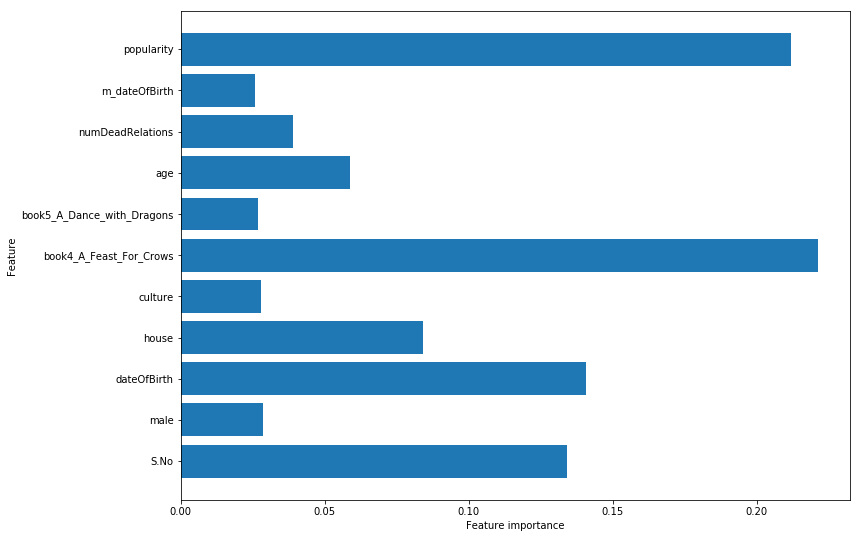

In [74]:
def plot_feature_importances(model, train = X_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

        
plot_feature_importances(full_gini_fit,
                         train = X_train,
                         export = False)


## 4.1 Optimal Random Forest Model based on feature importance

In [126]:
# Repreparing train/test split with the optimal model
got_data = got.loc[: , ['S.No', 'title','male', 'dateOfBirth',
       'house', 'culture','book1_A_Game_Of_Thrones',
        'book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows', 
        'book5_A_Dance_with_Dragons','age', 'isMarried','isAliveSpouse','isNoble','m_title','m_mother','m_father',
        'numDeadRelations','m_culture','m_isAliveSpouse','m_dateOfBirth','m_house',
            'm_spouse','m_age','popularity']]

X_train, X_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size = 0.10,
            random_state = 508,
            stratify = got_target)

In [76]:
########################
# Parameter tuning with GridSearchCV
########################

from sklearn.model_selection import GridSearchCV


# Creating a hyperparameter grid
estimator_space = pd.np.arange(100, 1350, 250)
leaf_space = pd.np.arange(1, 150, 15)
criterion_space = ['gini', 'entropy']
bootstrap_space = [True, False]
warm_start_space = [True, False]



param_grid = {'n_estimators' : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion' : criterion_space,
              'bootstrap' : bootstrap_space,
              'warm_start' : warm_start_space}



# Building the model object one more time
full_forest_grid = RandomForestClassifier(max_depth = None,
                                          random_state = 508)


# Creating a GridSearchCV object
full_forest_cv = GridSearchCV(full_forest_grid, param_grid, cv = 3)



# Fit it to the training data
full_forest_cv.fit(X_train, y_train)


# Print the optimal parameters and best score
tuned_optimal_rf_para = full_forest_cv.best_params_
tuned_optimal_rf_accuracy = full_forest_cv.best_score_

print("Tuned Optimal Random Forest Parameter:", tuned_optimal_rf_para)
print("Tuned Optimal Random Forest Accuracy:", tuned_optimal_rf_accuracy)

Tuned Optimal Random Forest Parameter: {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 600, 'warm_start': True}
Tuned Optimal Random Forest Accuracy: 0.8169979437971213


In [128]:
########################
# Building Random Forest Model Based on Best Parameters
########################

# {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 600, 'warm_start': True}
rf_optimal = RandomForestClassifier(bootstrap = True,
                                    criterion = 'gini',
                                    min_samples_leaf = 1,
                                    n_estimators = 600,
                                    warm_start = True)



rf_optimal_fit = rf_optimal.fit(X_train, y_train)


rf_optimal_pred_test = rf_optimal_fit.predict(X_test)
rf_optimal_pred_train = rf_optimal_fit.predict(X_train)

# Score
rf_optimal_train = rf_optimal.score(X_train, y_train)
rf_optimal_test  = rf_optimal.score(X_test, y_test)

print('Tuned Optimal Random Forest Training Score', rf_optimal_train.round(4))
print('Tuned Optimal Random Forest Testing Score:', rf_optimal_test.round(4))


# AUC:
tuned_rf_training_AUC_score = roc_auc_score(y_train, rf_optimal_pred_train)
tuned_rf_testing_AUC_score = roc_auc_score(y_test, rf_optimal_pred_test)

print('Tuned RF Optimal Training AUC Score:', tuned_rf_training_AUC_score.round(4))
print('Tuned RF Optimal Testing AUC Score:', tuned_rf_testing_AUC_score.round(4))

Tuned Optimal Random Forest Training Score 1.0
Tuned Optimal Random Forest Testing Score: 0.8205
Tuned RF Optimal Training AUC Score: 1.0
Tuned RF Optimal Testing AUC Score: 0.7024


## 4.2 Cross Validate our tuned Random Forest

In [112]:
# Cross-Validating the model with three folds
cv_rf_optimal_3 = cross_val_score(rf_optimal_fit,
                                      got_data,
                                      got_target,
                                      cv = 3)


print(cv_rf_optimal_3)


print('\nAverage: ',
      pd.np.mean(cv_rf_optimal_3).round(3),
      '\nMinimum: ',
      min(cv_rf_optimal_3).round(3),
      '\nMaximum: ',
      max(cv_rf_optimal_3).round(3))

[0.8027735  0.83359014 0.80864198]

Average:  0.815 
Minimum:  0.803 
Maximum:  0.834


# 5.0 Gradient Boosted Machines

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# Building a weak learner gbm
gbm_3 = GradientBoostingClassifier(loss = 'deviance',
                                  learning_rate = 1.5,
                                  n_estimators = 100,
                                  max_depth = 3,
                                  criterion = 'friedman_mse',
                                  warm_start = False,
                                  random_state = 508,
                                  )


gbm_basic_fit = gbm_3.fit(X_train, y_train)


gbm_basic_predict = gbm_basic_fit.predict(X_test)



# Training and Testing Scores

gbm_basic_train = gbm_basic_fit.score(X_train, y_train)
gmb_basic_test  = gbm_basic_fit.score(X_test, y_test)

print('GBM Optimal Training Score', gbm_basic_train.round(4))
print('GBM Optimal Testing Score:', gmb_basic_test.round(4))


GBM Optimal Training Score 1.0
GBM Optimal Testing Score: 0.7741


In [182]:
########################
# Applying GridSearchCV
########################

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Creating a hyperparameter grid
learn_space = pd.np.arange(0.01, 2.01, 0.05)
estimator_space = pd.np.arange(50, 1000, 50)
depth_space = pd.np.arange(1, 10)
leaf_space = pd.np.arange(1, 150, 15)
criterion_space = ['friedman_mse', 'mse', 'mae']


param_grid = {'learning_rate' : learn_space,
              'n_estimators' : estimator_space,
              'max_depth' : depth_space,
              'min_samples_leaf' : leaf_space,
              'criterion' : criterion_space}



# Building the model object one more time
gbm_grid = GradientBoostingRegressor(random_state = 508)



# Creating a GridSearchCV object
gbm_grid_cv = RandomizedSearchCV(estimator = gbm_grid,
                                 param_distributions = param_grid,
                                 n_iter = 50,
                                 scoring = None,
                                 cv = 3,
                                 random_state = 508)



# Fit it to the training data
gbm_grid_cv.fit(X_train, y_train)



# Print the optimal parameters and best score
print("Tuned GBM Parameter:", gbm_grid_cv.best_params_)
print("Tuned GBM Accuracy:", gbm_grid_cv.best_score_.round(4))



/Users/uieyao/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned GBM Parameter: {'n_estimators': 200, 'min_samples_leaf': 121, 'max_depth': 6, 'learning_rate': 0.060000000000000005, 'criterion': 'mse'}
Tuned GBM Accuracy: 0.2591


## 5.1 Tuned GBM

In [233]:
########################
# Optimal from Randomized Search
########################

# {'n_estimators': 200, 'min_samples_leaf': 121, 
# 'max_depth': 6, 'learning_rate': 0.060000000000000005, 'criterion': 'mse'}
gbm_optimal = GradientBoostingClassifier(loss = 'deviance',
                                        criterion = 'mse',
                                      learning_rate = 0.06000000000000,
                                      max_depth = 6,
                                      n_estimators = 200,
                                    min_samples_leaf = 121,
                                      random_state = 508)



gbm_optimal.fit(X_train, y_train)


gbm_optimal_score = gbm_optimal.score(X_test, y_test)


gbm_optimal_pred_test = gbm_optimal.predict(X_test)
gbm_optimal_pred_train = gbm_optimal.predict(X_train)

# Training and Testing Scores
gbm_optimal_train = gbm_optimal.score(X_train, y_train)
gmb_optimal_test  = gbm_optimal.score(X_test, y_test)

print('GBM Tuned Optimal Training Score', gbm_optimal_train.round(4))
print('GBM Tuned Optimal Testing Score:', gmb_optimal_test.round(4))


# AUC:
tuned_gbm_training_AUC_score = roc_auc_score(y_train, gbm_optimal_pred_train)
tuned_gbm_testing_AUC_score = roc_auc_score(y_test, gbm_optimal_pred_test)

print('Tuned GBM Optimal Training AUC Score:', tuned_gbm_training_AUC_score.round(4))
print('Tuned GBM Optimal Testing AUC Score:', tuned_gbm_testing_AUC_score.round(4))


GBM Tuned Optimal Training Score 0.8663
GBM Tuned Optimal Testing Score: 0.7988
Tuned GBM Optimal Training AUC Score: 0.7727
Tuned GBM Optimal Testing AUC Score: 0.6792


## 5.2 Cross Validate our tuned GBM model

In [231]:
# Cross-Validating the model with three folds
cv_gbm_optimal_3 = cross_val_score(rf_optimal_fit,
                                      got_data,
                                      got_target,
                                      cv = 3)


print(cv_gbm_optimal_3)


print('\nAverage: ',
      pd.np.mean(cv_gbm_optimal_3).round(3),
      '\nMinimum: ',
      min(cv_gbm_optimal_3).round(3),
      '\nMaximum: ',
      max(cv_gbm_optimal_3).round(3))

[0.8027735  0.82742681 0.78858025]

Average:  0.806 
Minimum:  0.789 
Maximum:  0.827


# 6.0 Compare 
- Tuned Optimal LogReg VS 
- Tuned Optimal Decision Tree VS
- Tuned Optimal Random Forest VS 
- Tuned Optimal GBM

In [234]:
## Logistic Regression
print('Tuned Logreg Optimal Training Score:', tuned_logreg_training_score.round(4))
print('Tuned Logreg Optimal Testing Score:', tuned_Logreg_testing_score.round(4))
print('Tuned Logreg Optimal Training AUC Score:', tuned_logreg_training_AUC_score.round(4))
print('Tuned Logreg Optimal Testing AUC Score:', tuned_logreg_testing_AUC_score.round(4))

## Decision Tree
print('\n')
print('Tuned Optimal Decision Tree Training Score', tuned_optimal_c_tree_training_Score.round(4))
print('Tuned Optimal Decision Tree Testing Score:', tuned_optimal_c_tree_testing_Score.round(4))

## Random Forest
print('\n')
print('Tuned Optimal Random Forest Training Score', rf_optimal_train.round(4))
print('Tuned Optimal Random Forest Testing Score:', rf_optimal_test.round(4))
print('Tuned RF Optimal Training AUC Score:', tuned_rf_training_AUC_score.round(4))
print('Tuned RF Optimal Testing AUC Score:', tuned_rf_testing_AUC_score.round(4))

## GBM
print('\n')
print('GBM Tuned Optimal Training Score', gbm_optimal_train.round(4))
print('GBM Tuned Optimal Testing Score:', gmb_optimal_test.round(4))
print('Tuned GBM Optimal Training AUC Score:', tuned_gbm_training_AUC_score.round(4))
print('Tuned GBM Optimal Testing AUC Score:', tuned_gbm_testing_AUC_score.round(4))


Tuned Logreg Optimal Training Score: 0.8067
Tuned Logreg Optimal Testing Score: 0.7947
Tuned Logreg Optimal Training AUC Score: 0.6635
Tuned Logreg Optimal Testing AUC Score: 0.6313


Tuned Optimal Decision Tree Training Score 0.8307
Tuned Optimal Decision Tree Testing Score: 0.77


Tuned Optimal Random Forest Training Score 1.0
Tuned Optimal Random Forest Testing Score: 0.8193
Tuned RF Optimal Training AUC Score: 1.0
Tuned RF Optimal Testing AUC Score: 0.7036


GBM Tuned Optimal Training Score 0.8663
GBM Tuned Optimal Testing Score: 0.7988
Tuned GBM Optimal Training AUC Score: 0.7727
Tuned GBM Optimal Testing AUC Score: 0.6792


##### The Higest AUC score is 0.7036 from Random Forest.

In [129]:
########################
# Saving Results
########################

# Saving best model scores
model_scores_df = pd.DataFrame({'RF_Score': [full_forest_cv.best_score_]})


model_scores_df.to_excel("Ensemble_Model_Results.xlsx")


# Saving model predictions

model_predictions_df = pd.DataFrame({'Actual' : y_test,
                                     'RF_Predicted': rf_optimal_pred_test})


model_predictions_df.to_excel("Xiaojun Yao_Ensemble_Model_Predictions.xlsx")